##  Taylor problem 5.2

last revised: 14-Jan-2019 by Dick Furnstahl [furnstahl.1@osu.edu]


The potential energy for two atoms in a molecule can sometimes be approximated by the Morse function

$\begin{align}
  U(r) = A\left[ \left(e^{(R-r)/S} -1\right)^2 -1 \right]
\end{align}$

for $0 < r < \infty$ with $A$, $R$, and $S$ all positive constants and $S \ll R$.

The goals are to find the equilibrium position $r_0$ and then the frequency of small oscillations.

Take the derivative and solve for the equilibrium $r_0$:

$\begin{align}
 \frac{dU}{dr} = 2A\left(e^{(R-r)/S} -1\right)\times -\frac{1}{S = 0
 \quad\Longrightarrow\quad
 r_0 = \lambda R
  \quad\Longrightarrow\quad
 U(r_0) = 2 \lambda U_0 
\end{align}$

Expand around $r = r_0$ up to $(r - r_0)^2$ to find the small angle approximation equation and frequency:

$\begin{align}
U_{sa}(r) = 2 \lambda U_0 + \frac{1}{2}\frac{2 U_0}{\lambda R^2} (r - r_0)^2
 \quad\Longrightarrow\quad
 k = \frac{2 U_0}{\lambda R^2}
 \quad\Longrightarrow\quad
 \omega = \sqrt{k/m} = \sqrt{\frac{2 U_0}{ m \lambda R^2}}
\end{align}$

## Make a plot to check $r_0$

In [50]:
%matplotlib notebook   
# Use notebook rather than inline so plot remains active between
#  cells and so we can zoom in.

In [51]:
import numpy as np

import matplotlib.pyplot as plt

In [52]:
def U_pot(r, lamb=1, R=1, U_0=1):
    """Potential from Taylor problem 5.13."""
    return U_0*(r/R + lamb**2 *(R/r))#A * ( (np.exp((big_R - r)/S) - 1.)**2 - 1. )

def U_pot_min(lamb=1, R=1, U_0=1):
    """Returns the value of r at the minimum of U(r) and the value of
       U(r) at that point."""
    return lamb*R,  U_pot(lamb*R, lamb, R, U_0)

In [55]:
def U_pot_sa_x2(r, lamb=1, R=1, U_0=1):
    """Plot the potential in the small angle approximation"""
    x = r - lamb*R
    return  2*U_0*lamb + (U_0 * x**2)/(lamb * R**2)

def U_pot_sa_x3(r, lamb=1, R=1, U_0=1):
    """Plot the potential in the small angle approximation"""
    x = r - lamb*R
    return  2*U_0*lamb + (U_0* x**2)/(lamb* R**2) - U_0* x**3 / (lamb**2 * R**3)


<IPython.core.display.Javascript object>


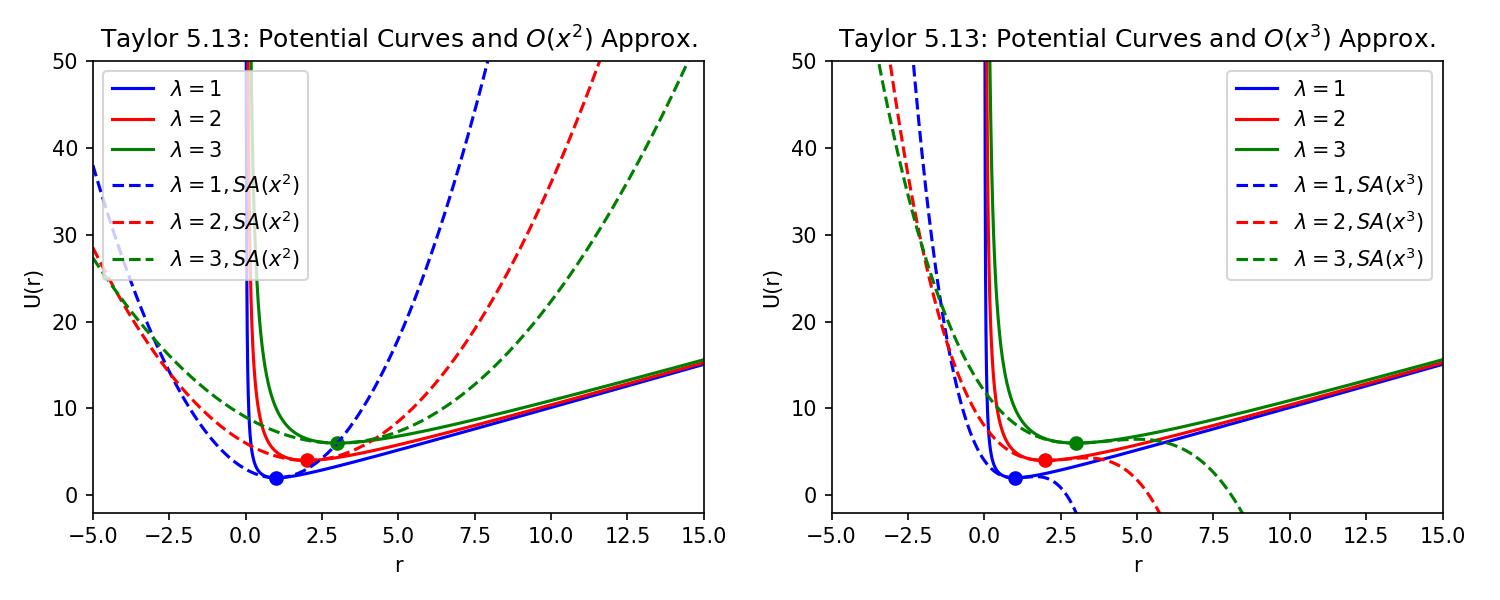

In [63]:
r_pts = np.arange(0.01, 20, .001)
U_pot_1 = U_pot(r_pts, lamb=1)
U_pot_2 = U_pot(r_pts, lamb=2)
U_pot_3 = U_pot(r_pts, lamb=3)


fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
ax.plot(r_pts, U_pot_1, label=r'$\lambda=1$', color='blue')
ax.plot(r_pts, U_pot_2, label=r'$\lambda=2$', color='red')
ax.plot(r_pts, U_pot_3, label=r'$\lambda=3$', color='green')

ax.set_xlim(-5, 15)
ax.set_ylim(-2.,50)

x0, y0 = U_pot_min(lamb=1)
ax.scatter(x0, y0, color='blue')
x0, y0 = U_pot_min(lamb=2)
ax.scatter(x0, y0, color='red')
x0, y0 = U_pot_min(lamb=3)
ax.scatter(x0, y0, color='green')

# "sa" here stands for "small-angle".
r_pts_neg = np.arange(-5, 20, .001)
U_pot_sa_1 = U_pot_sa_x2(r_pts_neg, lamb=1)
U_pot_sa_2 = U_pot_sa_x2(r_pts_neg, lamb=2)
U_pot_sa_3 = U_pot_sa_x2(r_pts_neg, lamb=3)
ax.plot(r_pts_neg, U_pot_sa_1, label=r'$\lambda=1, SA(x^2)$',color='blue', ls='--')
ax.plot(r_pts_neg, U_pot_sa_2, label=r'$\lambda=2, SA(x^2)$', color='red', ls='--')
ax.plot(r_pts_neg, U_pot_sa_3, label=r'$\lambda=3, SA(x^2)$', color='green', ls='--')


ax.set_xlabel('r')
ax.set_ylabel('U(r)')
ax.set_title(r"Taylor 5.13: Potential Curves and $O(x^2)$ Approx.")

ax.legend()

ax2 = fig.add_subplot(1,2,2)
ax = fig.add_subplot(1,2,1)
ax2.plot(r_pts, U_pot_1, label=r'$\lambda=1$', color='blue')
ax2.plot(r_pts, U_pot_2, label=r'$\lambda=2$', color='red')
ax2.plot(r_pts, U_pot_3, label=r'$\lambda=3$', color='green')

ax2.set_xlim(-5, 15)
ax2.set_ylim(-2.,50)

x0, y0 = U_pot_min(lamb=1)
ax2.scatter(x0, y0, color='blue')
x0, y0 = U_pot_min(lamb=2)
ax2.scatter(x0, y0, color='red')
x0, y0 = U_pot_min(lamb=3)
ax2.scatter(x0, y0, color='green')

# "sa" here stands for "small-angle".
r_pts_neg = np.arange(-5, 20, .001)
U_pot_sa_1 = U_pot_sa_x3(r_pts_neg, lamb=1)
U_pot_sa_2 = U_pot_sa_x3(r_pts_neg, lamb=2)
U_pot_sa_3 = U_pot_sa_x3(r_pts_neg, lamb=3)
ax2.plot(r_pts_neg, U_pot_sa_1, label=r'$\lambda=1, SA(x^3)$',color='blue', ls='--')
ax2.plot(r_pts_neg, U_pot_sa_2, label=r'$\lambda=2, SA(x^3)$', color='red', ls='--')
ax2.plot(r_pts_neg, U_pot_sa_3, label=r'$\lambda=3, SA(x^3)$', color='green', ls='--')


ax2.set_xlabel('r')
ax2.set_ylabel('U(r)')
ax2.set_title(r"Taylor 5.13: Potential Curves and $O(x^3)$ Approx.")

ax2.legend()

fig.tight_layout()
fig.savefig('Taylor_prob_5.13.png', bbox_inches='tight')

Now put in small angle potentials (note that this changes the figure above, which is still the active figure (because we are using `%matplotlib notebook`).  Use the controls to zoom in to verify that the small-angle approximated $U(r)$ really does agree for $r$ close enough to the minimum.  

Can we solve for exact and small angle oscillations numerically?